LS Regression
Cross Validation
prediction errors for each cross validation
[45.41310195049939, 51.226019693548665, 50.483188296035735, 48.648591383988716, 48.74414947497278]
plots: left: predicted_orange and truth_blue,  right: x_axis: ground truth, y_axis: predicted


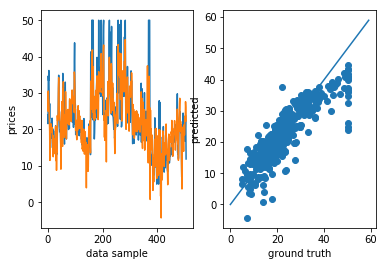

learn lambda
The best lambda is: 0


In [191]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
X, target = load_boston(return_X_y = True)

print('LS Regression')
X = np.concatenate((X, np.ones((len(X), 1))), axis = 1)
y = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(target)

b = y[-1]
w = y[:-1]
X_temp = []

for i in range(len(X)):
    X_temp.append(X[i].tolist())

X = X_temp

K_X = [[], [], [], [], []]
K_target = [[], [], [], [], []]

print('Cross Validation')
counter = 0;
for i in range(len(X)):
    
    if (counter < 5):
        
        K_X[counter].append(X[i])
        K_target[counter].append(target[i])
    
    else:
        counter = 0
        K_X[counter].append(X[i])
        K_target[counter].append(target[i])
        
    counter+=1
error_CV = []

for index in range(5):
    X_this = []
    target_this = []
    X_this_valid = []
    target_this_valid = []
    for i in range(5):
        
        if(i != index):
            X_this.extend(K_X[i])
            target_this.extend(K_target[i])
           
        else:
            #print('here')
            X_this_valid.extend(K_X[i])
            target_this_valid.extend(K_target[i])
    
    X_this = np.asarray(X_this)
    target_this = np.asarray(target_this)
    X_this_valid = np.asarray(X_this_valid)
    target_this_valid = np.asarray(target_this_valid)
    
    y_this = np.linalg.inv(X_this.T.dot(X_this)).dot(X_this.T).dot(target_this)
    
    target_this_valid_predict = X_this_valid.dot(y_this)
    error_CV.append(np.linalg.norm(target_this_valid_predict-target_this_valid))
print('prediction errors for each cross validation')
print(error_CV)
    
error_mean = np.mean(error_CV) 

print('plots: left: predicted_orange and truth_blue,  right: x_axis: ground truth, y_axis: predicted')
fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(target)
ax.plot(np.asarray(X).dot(y))
ax.set_ylabel('prices')
ax.set_xlabel('data sample')
#print(np.linalg.norm(target-np.asarray(X).dot(y)))
#ax.ylabel('target')

ax2 = fig.add_subplot(122)
ax2.scatter(target, np.asarray(X).dot(y))
ax2.plot(range(60), range(60))
ax2.set_xlabel('ground truth')
ax2.set_ylabel('predicted')
plt.show()



#Ridge regression
def ridge_regression(X_v, target_v, ll):
    y_v = np.linalg.inv(X_v.T.dot(X_v) + ll*np.identity(X_v.shape[1])).dot(X_v.T).dot(target_v)
    return y_v
X = np.asarray(X)
#b_lasso =  np.mean(X[:, :-1] , axis = 0)
#X_centered = X[:, :-1] - b_lasso
#target_centered = target - np.mean(target)
#X_centered = X_centered.tolist()

print('learn lambda')
"""ll_array = np.linspace(0, 1, 101).tolist();
ll_array.extend(np.linspace(1.01, 10, 100).tolist());
ll_array.extend(np.linspace(10.1, 100, 100).tolist());
ll_array=np.asarray(ll_array)"""
ll_array = np.linspace(0, 10, 1001)
error_CV = []
y_array = []

K_X = [[],[],[],[],[]]
K_target = [[],[],[],[],[]]
counter_outer = 0
counter = 0
for i in range(len(X)):

        if (counter < 5):

            K_X[counter].append(X[i])
            K_target[counter].append(target[i])

        else:
            counter = 0
            K_X[counter].append(X[i])
            K_target[counter].append(target[i])

        counter+=1

for ll in ll_array:
    #error_CV.append([])
    #y_array.append([])
    #Cross Validation
    counter = 0;
    y_array_temp =[]
    error_CV_temp = []
    
    

    for index in range(5):
        X_this = []
        target_this = []
        X_this_valid = []
        target_this_valid = []
        for i in range(5):

            if(i != index):
                X_this.extend(K_X[i])
                target_this.extend(K_target[i])

            else:
                #print('here')
                X_this_valid.extend(K_X[i])
                target_this_valid.extend(K_target[i])

        X_this = np.asarray(X_this)
        target_this = np.asarray(target_this)
        X_this_valid = np.asarray(X_this_valid)
        target_this_valid = np.asarray(target_this_valid)
        #print(target_this_valid.shape)
        y_this = ridge_regression(X_this, target_this, ll)
        #y_this = np.linalg.inv(X_this.T.dot(X_this)).dot(X_this.T).dot(target_this)

        target_this_valid_predict = X_this_valid.dot(y_this)
        y_array_temp.append(np.mean(y_this, axis=0))
        error_CV_temp.append(np.linalg.norm(target_this_valid_predict-target_this_valid))
       
    #y_array[counter_outer].append(np.mean(y_this, axis=0))
    #error_CV[counter_outer].append(np.linalg.norm(target_this_valid_predict-target_this_valid))
    #y_array[counter_outer].append(y_array_temp)
    #error_CV[counter_outer].append(error_CV_temp)  
    y_array.append(y_array_temp)
    error_CV.append(error_CV_temp)
    counter_outer+=1;
    
    

print('The best lambda is: ' + str(np.argmin(np.mean(error_CV, axis=1))))

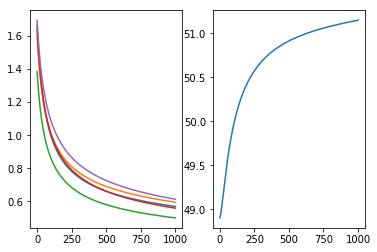

In [193]:

min_error = np.min(error_CV)


fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(y_array)

ax = fig.add_subplot(122)
ax.plot(np.mean(error_CV, axis=1))
plt.show()